# Model Building

We are going to use ensemble learning algorithms to build the model. Before building and training the model, we need to separate the dependent variable and split the dataset into training and testing set.

In [5]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [6]:
## For ignoring warnings to view clean output
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [7]:
## Importing the dataset
df = pd.read_csv('cleaned.csv',header=0)

In [8]:
df.sample(10)

,Year,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
2215,2018,Alemtena,Light Soil,29.0,12.0,543.8,46.0,2830.0
3049,2018,Denkaka,Black Soil,28.5,13.0,543.8,45.0,2485.0
5320,2019,Chefe Donsa,Black Soil,30.0,12.5,811.2,58.0,240.0
8053,2013,Minjar,Light Soil,26.0,8.0,487.6,67.0,1458.0
5302,2019,Chefe Donsa,Black Soil,30.0,13.0,811.2,51.0,470.0
545,2019,DZ-BS,Black Soil,30.0,13.5,811.2,45.0,720.0
3626,2017,Alemtena,Light Soil,26.5,11.0,612.0,60.0,420.0
4370,2019,DZ-BS,Black Soil,29.5,12.0,811.2,54.0,4020.0
4393,2019,DZ-BS,Black Soil,26.0,10.2,811.2,58.0,3510.0
7912,2014,Alemtena,Light Soil,24.5,15.0,559.8,46.0,1195.0


In [9]:
df.drop(['Year'],axis=1, inplace=True)

In [10]:
df.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity,Yield Kg/ha
0,Chefe Donsa,Black Soil,31.0,13.0,811.2,68.0,980.0
1,Chefe Donsa,Black Soil,30.5,16.0,811.2,72.0,670.0
2,Chefe Donsa,Black Soil,29.5,14.0,811.2,68.0,730.0
3,Chefe Donsa,Black Soil,30.0,13.0,811.2,54.0,710.0
4,Chefe Donsa,Black Soil,31.0,12.0,811.2,70.0,780.0


In [11]:
df.shape

(8077, 7)

In [12]:
### Separating Independent and Dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:, 6]

In [9]:
X.head()

,Location,Soil Type,Max_Temperature,Min_Teperature,Rainfall,Humidity
0,Chefe Donsa,Black Soil,31.0,13.0,811.2,68.0
1,Chefe Donsa,Black Soil,30.5,16.0,811.2,72.0
2,Chefe Donsa,Black Soil,29.5,14.0,811.2,68.0
3,Chefe Donsa,Black Soil,30.0,13.0,811.2,54.0
4,Chefe Donsa,Black Soil,31.0,12.0,811.2,70.0


In [10]:
X.shape

(8077, 6)

In [11]:
y.head()

0    980.0
1    670.0
2    730.0
3    710.0
4    780.0
Name: Yield Kg/ha, dtype: float64

### Data Transformation
#### Handling Categorical Variables - Creating Dummy Variables( Changing the categorical value to numeric(0,1))

In [13]:
# Shows the number of columns after creating dummy variables
pd.get_dummies(df,drop_first=True).shape

(8077, 12)

In [14]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
X.sample(4)

,Max_Temperature,Min_Teperature,Rainfall,Humidity,Location_Alemtena,Location_Chefe Donsa,Location_DZ-BS,Location_DZ-LS,Location_Denkaka,Location_Minjar,Soil Type_Light Soil
2623,24.0,14.5,543.8,48.0,0,0,0,0,0,0,0
5653,22.0,13.0,811.2,69.0,0,1,0,0,0,0,0
4141,25.0,15.0,510.9,60.0,0,0,0,0,1,0,0
2942,27.0,13.0,543.8,65.0,1,0,0,0,0,0,1


In [15]:
X.shape

(8077, 11)

### Standardization 
Before building the model we need to standardize the features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
## shows the wheather the features are in standardized format or not
print("Mean of the dataset:", np.mean(X).round(8))
print("Standard deviation of the dataset: ", np.std(X).round(8))

Mean of the dataset: -0.0
Standard deviation of the dataset:  1.0


### Splitting the dataset into training and testing set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# print the shapes of our training and test set
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6461, 11)
(1616, 11)
(6461,)
(1616,)


### Model Building with Random Forest Regressor

In [18]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
RF=RandomForestRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 1.0322680473327637 sec


In [19]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [20]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 465.4315275985188
MSE: 449065.7672114458
RMSE: 670.1236954558806


In [21]:
RF.score(X_test,y_test)

0.6331642557309799

In [22]:
RF.score(X_train,y_train)

0.9437320526529566

In [23]:
y_pred=RF.predict(X_test)

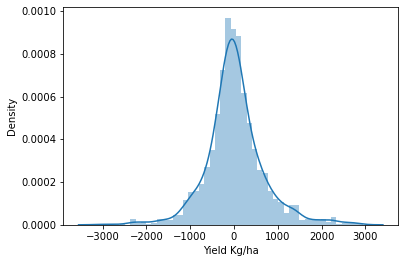

In [24]:
sns.distplot(y_test-y_pred)
plt.show()

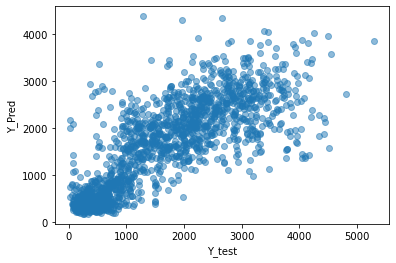

In [25]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [26]:
metrics.r2_score(y_test,y_pred)

0.6331642557309799

### Model Building with AdaBoostRegressor

In [40]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.8664700984954834 sec


In [41]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 610.0718712950272
MSE: 589747.0623598932
RMSE: 767.9499087570056


In [43]:
RF.score(X_test,y_test)

0.5182436107417774

In [44]:
RF.score(X_train,y_train)

0.5294757788806597

In [45]:
y_pred=RF.predict(X_test)

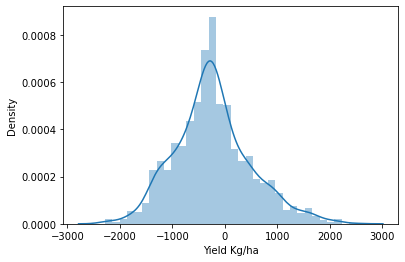

In [46]:
sns.distplot(y_test-y_pred)
plt.show()

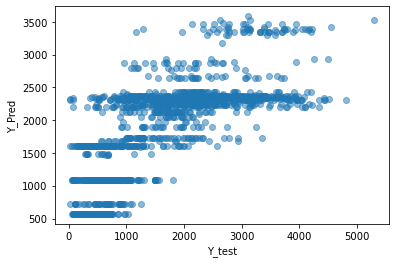

In [47]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [52]:
from sklearn.ensemble import AdaBoostRegressor
import time
start_time = time.time()
RF=AdaBoostRegressor()
# feeding the training data into the model
RF.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.18952107429504395 sec


In [53]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 550.2245054519302
MSE: 512821.17510417796
RMSE: 716.1153364536874


In [55]:
RF.score(X_test,y_test)

0.5810833263590176

In [56]:
RF.score(X_train,y_train)

0.5927669476982408

### Model Building with GradientBoostingRegressor

In [57]:
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
RF = GradientBoostingRegressor() 
RF.fit(X_train, y_train) 
   
# Predicting the Test set results 
y_pred = model.predict(X_test)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 1.1526410579681396 sec


In [58]:
# predicting the values for x-test
predictions=RF.predict(X_test)

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 459.3119772476496
MSE: 410940.56675348594
RMSE: 641.0464622423915


In [60]:
RF.score(X_test,y_test)

0.6643082157176159

In [61]:
RF.score(X_train,y_train)

0.6886377932066305

In [62]:
y_pred=RF.predict(X_test)

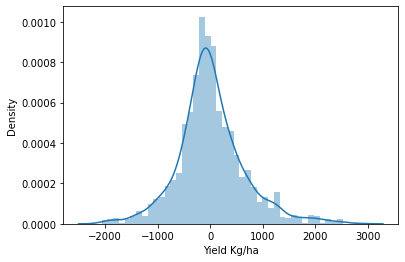

In [63]:
sns.distplot(y_test-y_pred)
plt.show()

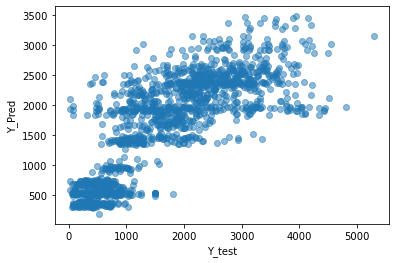

In [64]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()

In [2]:
!pip install xgboost 

In [3]:
import xgboost as xgb

In [27]:
start_time = time.time()
model = xgb.XGBRegressor()
# feeding the training data into the model
model.fit(X_train, y_train)
print("Execution time: " + str((time.time() - start_time)) + ' sec')

Execution time: 0.26891279220581055 sec


In [31]:
# predicting the values for x-test
pred=model.predict(X_test)

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 464.5270434352431
MSE: 432016.47275697684
RMSE: 657.2796001375494


In [33]:
model.score(X_test,y_test)

0.6470915935000197

In [34]:
model.score(X_train,y_train)

0.8476821971342521

In [35]:
y_pred=model.predict(X_test)

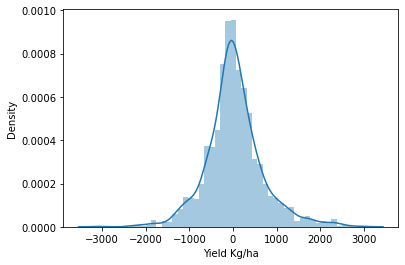

In [36]:
sns.distplot(y_test-y_pred)
plt.show()

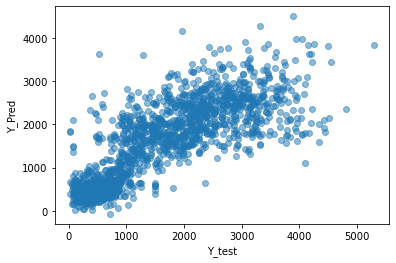

In [37]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_Pred")
plt.show()